# Función de densidad de probabilidad
vs función de masa de probabilidad

## Notación

$f_x(x)$

# Distribución uniforme

$\huge f_x(x) = \frac{1}{B-A}$  si A<x<B

In [1]:
from matplotlib import pyplot as plt
import numpy as np

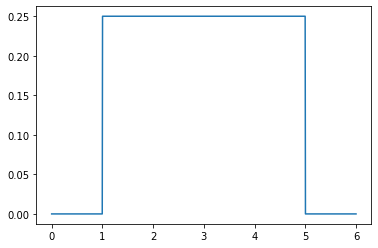

In [2]:
A = 1
B = 5
x = np.linspace(A-1, B+1, 1000)
y = ((x>A) & (x<B)) / (B-A)
plt.plot(x, y)
plt.show()

- El area debajo de la curva es 1
- Es densidad por lo que son siempre probabilidades en un intervalo que se calcula como el area de ese intervalo
- $\mu_x=\frac{A+B}{2}$
- $\sigma_x =\frac{(B-A)^2}{12}$

# Como generamos?

In [3]:
np.random.uniform(A, B, 100)

array([4.04289415, 2.88676342, 2.98222787, 3.13664229, 2.46163216,
       4.41226108, 4.09344048, 4.57508166, 1.63545202, 3.53692482,
       2.89363846, 1.13779048, 1.77447506, 1.33194718, 4.28608263,
       2.0313393 , 1.898287  , 4.14885765, 4.81861422, 4.84409283,
       2.98585752, 4.68359904, 1.27972123, 3.48329043, 1.603173  ,
       3.32593438, 2.37681572, 4.90090366, 1.21683366, 1.26748378,
       3.28567872, 1.19700563, 4.91281052, 4.3436009 , 1.49126965,
       2.44929275, 1.73290353, 2.19438595, 1.40852482, 1.52503418,
       3.15842122, 1.48867427, 1.74228587, 1.70016204, 3.78650899,
       1.17501798, 3.21607713, 4.81397487, 4.76963477, 1.88276395,
       1.57190022, 2.05289044, 4.25870107, 2.86559736, 4.68236862,
       4.8195488 , 1.09893967, 1.13160739, 2.11669701, 2.76474166,
       2.97384136, 1.83218664, 4.17001038, 4.21559651, 1.80073954,
       2.24772705, 2.02178114, 3.08655363, 1.6655367 , 4.55964048,
       2.47713464, 2.64116137, 2.64014429, 1.88562584, 3.19313

# Distribución Gaussiana

$\huge f_x(x) = \frac{1}{\sqrt{2\pi\sigma_x^2}}e^{-\frac{(x-\mu_x)^2}{2\sigma_x^2}}$ 

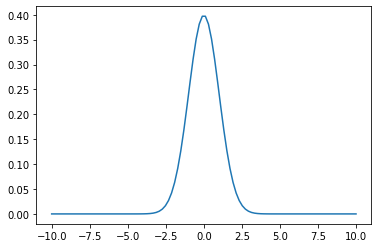

In [6]:
from scipy.stats import norm
rango = np.linspace(-10, 10, 100)
media = 0
std = 1
pdf = norm.pdf(rango, media, std)
plt.plot(rango, pdf)
plt.show()

Cambiar media y std

# Dataset de pesos y alturas

In [10]:
import pandas as pd
df = pd.read_csv('alturas-pesos-1-train.csv')

In [12]:
# df

In [13]:
from collections import Counter
pesos = df['Peso'].values
peso_H =  df[df['Genero'] == 'Hombre']['Peso'].values

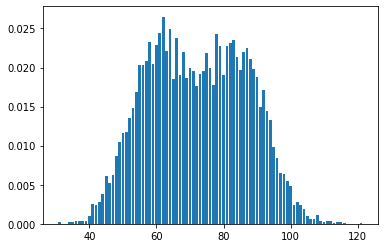

In [9]:
pesos_frecuencia = dict(Counter(pesos))
peso_prob = {pe:c/len(pesos) for pe, c in pesos_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

Es gaussiana?

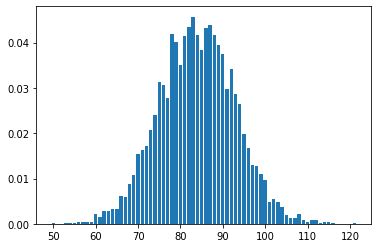

In [14]:
peso_H_frecuencia = dict(Counter(peso_H))
peso_prob_H = {pe:c/len(peso_H) for pe, c in peso_H_frecuencia.items()}
plt.bar(peso_prob_H.keys(), peso_prob_H.values())
plt.show()

Es gaussiana?

In [26]:
mean = peso_H.mean()
std = peso_H.std()
print(mean, std)

83.95577211394303 8.987069000037568


### La distribución Gaussiana queda determinada por solo dos parámetros:
Media y Varianza

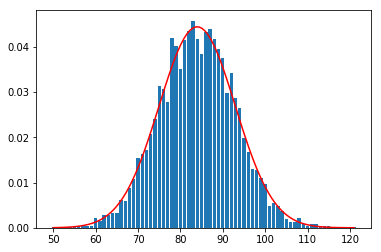

In [27]:
rango = np.linspace(peso_H.min(), peso_H.max(), 100)
pdf = norm.pdf(rango, mean, std)
plt.plot(rango, pdf, c='r')
plt.bar(peso_prob_H.keys(), peso_prob_H.values())
plt.show()

# Como generamos?

In [28]:
np.random.normal(mean, std, 100)

array([86.67769466, 90.16623625, 95.59188308, 78.34145671, 85.74461801,
       93.52204147, 73.23835626, 86.41891889, 81.5142715 , 92.30236659,
       93.31013149, 82.4233536 , 78.61228756, 89.11825163, 85.12498826,
       80.62508895, 92.02841117, 82.31057991, 80.37651815, 83.16746911,
       77.86870841, 82.19572387, 79.34789455, 83.19033444, 68.05453448,
       86.74290751, 91.63630314, 83.02216558, 75.97079609, 80.63632185,
       80.63958164, 88.14526782, 85.65109921, 94.27665195, 91.32424158,
       92.95269192, 84.1115271 , 94.05001359, 91.33482121, 94.05025156,
       84.0610742 , 85.62600654, 88.2268612 , 83.76012416, 87.91762074,
       74.79147321, 75.25132394, 99.74790379, 77.79011655, 96.64785909,
       71.2769691 , 71.06038215, 81.98859711, 80.37875224, 94.16268089,
       88.58722404, 81.39968119, 84.31411211, 88.59772868, 84.21624418,
       75.24410498, 78.68614626, 82.87867845, 86.36746989, 68.53422189,
       84.79647626, 74.30546965, 95.71371635, 82.27843537, 83.45

# Teorema del limite central

Problema de laboratorio

Dadas $X_1$, $X_2$, $X_3$ ... $X_N$ todas V.As. i.i.d. (Intependientes e Identicamente Distribuidas)

Donde la media $E[X_i] = \mu_{x_i}$

Y la varianza $E[(X_i-\mu_{x_i})^2] = \sigma^2_{x_i} < \infty$

$S = \sum_i^N{\frac{X_i}{N}}$

La V.A S tiene distribución gaussiana con media $\mu_{x_i}$ y varianza $\sigma^2_{x_i}$ cuando N tiende a infinito

https://www.kaggle.com/c/santander-customer-transaction-prediction/data